In [ ]:
#Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore


In [2]:
#Importing the model

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
df=pd.read_csv(r"C:\Users\SKAN\Downloads\default.csv")

In [6]:
df

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
...,...,...,...,...,...,...,...,...,...,...,...
776,Male,0,unskilled,2,46,14.7,Default,critical,0,consumerdurable,0
777,Male,0,unskilled,3,54,14.7,Default,good,0,car,0
778,Male,0,unskilled,3,51,14.8,Default,verygood,0,car,0
779,Male,0,unskilled,3,54,14.8,Default,good,0,car,0


In [7]:
df=pd.get_dummies(df,drop_first=True)

In [8]:
df

,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Gender_Male,Job_skilled,Job_unskilled,Status_No,CreditHistory_good,CreditHistory_poor,CreditHistory_verygood,Purpose_consumerdurable,Purpose_education,Purpose_personal
0,0,14,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
1,1,15,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
2,0,16,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
3,1,13,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
4,1,12,85,3.3,1,2,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0,2,46,14.7,0,0,1,0,1,0,0,0,0,1,0,0
777,0,3,54,14.7,0,0,1,0,1,0,1,0,0,0,0,0
778,0,3,51,14.8,0,0,1,0,1,0,0,0,1,0,0,0
779,0,3,54,14.8,0,0,1,0,1,0,1,0,0,0,0,0


In [10]:
df.dtypes

LoanOffered                  int64
WorkExp                      int64
CreditScore                  int64
EMIRatio                   float64
Ownhouse                     int64
Dependents                   int64
Gender_Male                  uint8
Job_skilled                  uint8
Job_unskilled                uint8
Status_No                    uint8
CreditHistory_good           uint8
CreditHistory_poor           uint8
CreditHistory_verygood       uint8
Purpose_consumerdurable      uint8
Purpose_education            uint8
Purpose_personal             uint8
dtype: object

In [9]:
x=df.drop(columns="Status_No",axis=1)
y=df["Status_No"]

In [10]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [11]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [12]:
print(df_columns)

                          0
0               LoanOffered
1                   WorkExp
2               CreditScore
3                  EMIRatio
4                  Ownhouse
5                Dependents
6               Gender_Male
7               Job_skilled
8             Job_unskilled
9        CreditHistory_good
10       CreditHistory_poor
11   CreditHistory_verygood
12  Purpose_consumerdurable
13        Purpose_education
14         Purpose_personal


In [13]:
print(df_scores)

             0
0     0.890154
1   289.349136
2   595.246283
3    62.354929
4   111.960568
5   114.556099
6     0.721760
7     2.673348
8     2.718495
9     0.673295
10   29.085253
11   11.697158
12    0.017617
13    0.239560
14    0.379920


In [14]:
df1=pd.concat([df_columns,df_scores],axis=1)
df1.columns=["specs","score"]

In [15]:
df1

,specs,score
0,LoanOffered,0.890154
1,WorkExp,289.349136
2,CreditScore,595.246283
3,EMIRatio,62.354929
4,Ownhouse,111.960568
5,Dependents,114.556099
6,Gender_Male,0.721760
7,Job_skilled,2.673348
8,Job_unskilled,2.718495
9,CreditHistory_good,0.673295


In [16]:
print(df1.nlargest(10,'score'))

                     specs       score
2              CreditScore  595.246283
1                  WorkExp  289.349136
5               Dependents  114.556099
4                 Ownhouse  111.960568
3                 EMIRatio   62.354929
10      CreditHistory_poor   29.085253
11  CreditHistory_verygood   11.697158
8            Job_unskilled    2.718495
7              Job_skilled    2.673348
0              LoanOffered    0.890154


In [17]:
df.columns

Index(['LoanOffered', 'WorkExp', 'CreditScore', 'EMIRatio', 'Ownhouse',
       'Dependents', 'Gender_Male', 'Job_skilled', 'Job_unskilled',
       'Status_No', 'CreditHistory_good', 'CreditHistory_poor',
       'CreditHistory_verygood', 'Purpose_consumerdurable',
       'Purpose_education', 'Purpose_personal'],
      dtype='object')

In [18]:
x=df[["CreditScore","WorkExp","Dependents","Ownhouse","EMIRatio","CreditHistory_poor","CreditHistory_verygood"]]
y=df["Status_No"]

In [77]:
x_scaled=zscore(x)
print(x_scaled)

     CreditScore   WorkExp  Dependents  Ownhouse  EMIRatio  \
0       0.199627  0.426162   -0.076732  0.549242 -2.332070   
1       0.864482  0.688855    0.859636  0.549242 -2.332070   
2       0.199627  0.951548   -0.076732  0.549242 -2.332070   
3       0.864482  0.163469    0.859636  0.549242 -2.332070   
4       0.116520 -0.099225   -0.076732  0.549242 -2.224353   
..           ...       ...         ...       ...       ...   
776    -3.124648 -2.726157   -1.949467 -1.820691  1.868883   
777    -2.459793 -2.463464   -1.949467 -1.820691  1.868883   
778    -2.709114 -2.463464   -1.949467 -1.820691  1.904789   
779    -2.459793 -2.463464   -1.949467 -1.820691  1.904789   
780    -2.709114 -2.463464   -1.949467 -1.820691  1.904789   

     CreditHistory_poor  CreditHistory_verygood  
0              2.655475               -0.716635  
1              2.655475               -0.716635  
2              2.655475               -0.716635  
3              2.655475               -0.716635  
4    

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1)

In [87]:
print("x and y Train Dataset shape:", x_train.shape,y_train.shape)

x and y Train Dataset shape: (546, 7) (546,)


In [88]:
print("x and y Test Dataset shape:", x_test.shape,y_test.shape)

x and y Test Dataset shape: (235, 7) (235,)


In [ ]:
#To build some classification models by using user defined function to find which model is better

In [ ]:
#Initialising some models in a list

In [82]:
models=[LogisticRegression(max_iter=500),KNeighborsClassifier(),SVC(kernel='linear'),RandomForestClassifier()]

In [ ]:
#user defined function for training data prediction and to calculate their metrics

In [83]:
def compare_models_train():
    for model in models:
        #training the model
        model.fit(x_train,y_train)
        #evaluating the model
        train_data_prediction=model.predict(x_train)
        accuracy=accuracy_score(y_train,train_data_prediction)
        con_mat=confusion_matrix(y_train,train_data_prediction)
        
        print("Metrics of ",model)
        
        print("\n Accuracy_score of the", model,"=", accuracy,"\n")       
              
        
        print("\n Confusion_matrix  of the", model,"=", con_mat)
       
        print("\n Heat map of",model)
        sns.heatmap((confusion_matrix(y_train,train_data_prediction)),annot=True,fmt='05g')
        plt.xlabel('Predicted')
        plt.ylabel('Actuals')
        plt.show()
        
        print(" Classification_Report of ",model)
        print("\n",classification_report(y_train,train_data_prediction))
        print("----------------------------------------------------------------------------------")

Metrics of  LogisticRegression(max_iter=500)

 Accuracy_score of the LogisticRegression(max_iter=500) = 0.9761904761904762 


 Confusion_matrix  of the LogisticRegression(max_iter=500) = [[ 76   8]
 [  5 457]]

 Heat map of LogisticRegression(max_iter=500)


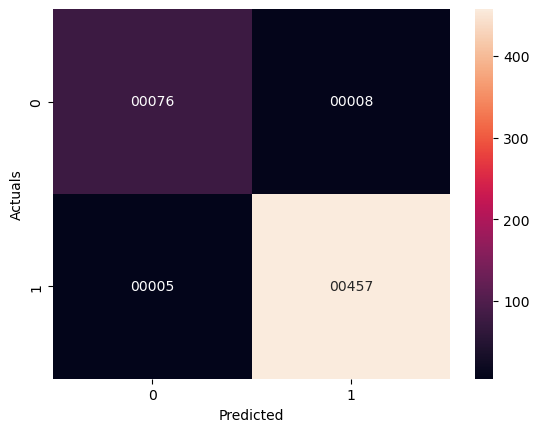

 Classification_Report of  LogisticRegression(max_iter=500)

               precision    recall  f1-score   support

           0       0.94      0.90      0.92        84
           1       0.98      0.99      0.99       462

    accuracy                           0.98       546
   macro avg       0.96      0.95      0.95       546
weighted avg       0.98      0.98      0.98       546

----------------------------------------------------------------------------------
Metrics of  KNeighborsClassifier()

 Accuracy_score of the KNeighborsClassifier() = 0.9816849816849816 


 Confusion_matrix  of the KNeighborsClassifier() = [[ 80   4]
 [  6 456]]

 Heat map of KNeighborsClassifier()


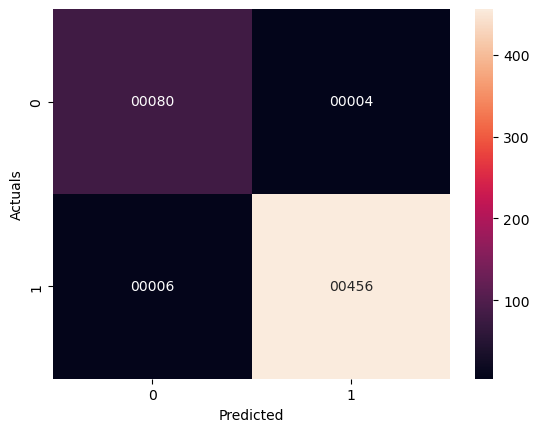

 Classification_Report of  KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.93      0.95      0.94        84
           1       0.99      0.99      0.99       462

    accuracy                           0.98       546
   macro avg       0.96      0.97      0.97       546
weighted avg       0.98      0.98      0.98       546

----------------------------------------------------------------------------------
Metrics of  SVC(kernel='linear')

 Accuracy_score of the SVC(kernel='linear') = 0.978021978021978 


 Confusion_matrix  of the SVC(kernel='linear') = [[ 76   8]
 [  4 458]]

 Heat map of SVC(kernel='linear')


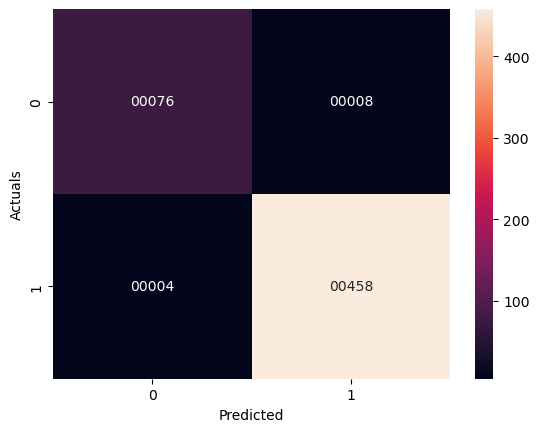

 Classification_Report of  SVC(kernel='linear')

               precision    recall  f1-score   support

           0       0.95      0.90      0.93        84
           1       0.98      0.99      0.99       462

    accuracy                           0.98       546
   macro avg       0.97      0.95      0.96       546
weighted avg       0.98      0.98      0.98       546

----------------------------------------------------------------------------------
Metrics of  RandomForestClassifier()

 Accuracy_score of the RandomForestClassifier() = 1.0 


 Confusion_matrix  of the RandomForestClassifier() = [[ 84   0]
 [  0 462]]

 Heat map of RandomForestClassifier()


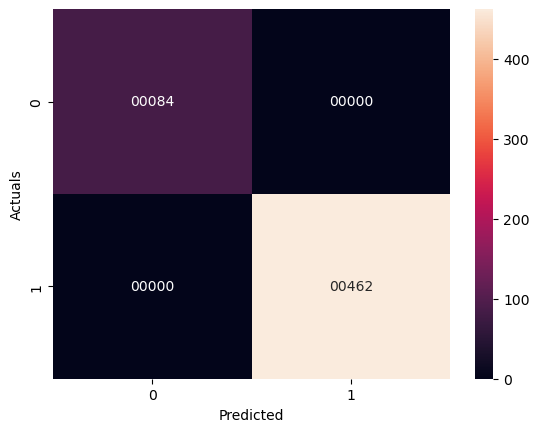

 Classification_Report of  RandomForestClassifier()

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       462

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546

----------------------------------------------------------------------------------


In [84]:
compare_models_train()

In [89]:
#user defined function for testing data prediction and to calculate their metrics

In [90]:
def compare_models_test():
    for model in models:
        #training the model
        model.fit(x_train,y_train)
        #evaluating the model
        test_data_prediction=model.predict(x_test)
        accuracy=accuracy_score(y_test,test_data_prediction)
        con_mat=confusion_matrix(y_test,test_data_prediction)
        
        print("Metrics of ",model)
        
        print("\n Accuracy_score of the", model,"=", accuracy,"\n")       
              
        
        print("\n Confusion_matrix  of the", model,"=", con_mat)
       
        print("\n Heat map of",model)
        sns.heatmap((confusion_matrix(y_test,test_data_prediction)),annot=True,fmt='05g')
        plt.xlabel('Predicted')
        plt.ylabel('Actuals')
        plt.show()
        
        print(" Classification_Report of ",model)
        print("\n",classification_report(y_test,test_data_prediction))
        print("----------------------------------------------------------------------------------")

Metrics of  LogisticRegression(max_iter=500)

 Accuracy_score of the LogisticRegression(max_iter=500) = 0.9787234042553191 


 Confusion_matrix  of the LogisticRegression(max_iter=500) = [[ 38   3]
 [  2 192]]

 Heat map of LogisticRegression(max_iter=500)


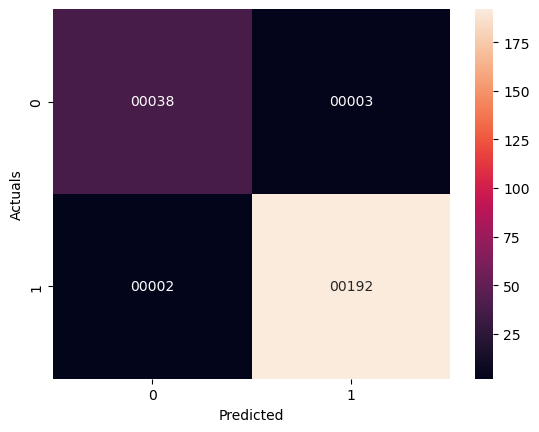

 Classification_Report of  LogisticRegression(max_iter=500)

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.98      0.99      0.99       194

    accuracy                           0.98       235
   macro avg       0.97      0.96      0.96       235
weighted avg       0.98      0.98      0.98       235

----------------------------------------------------------------------------------
Metrics of  KNeighborsClassifier()

 Accuracy_score of the KNeighborsClassifier() = 0.9872340425531915 


 Confusion_matrix  of the KNeighborsClassifier() = [[ 40   1]
 [  2 192]]

 Heat map of KNeighborsClassifier()


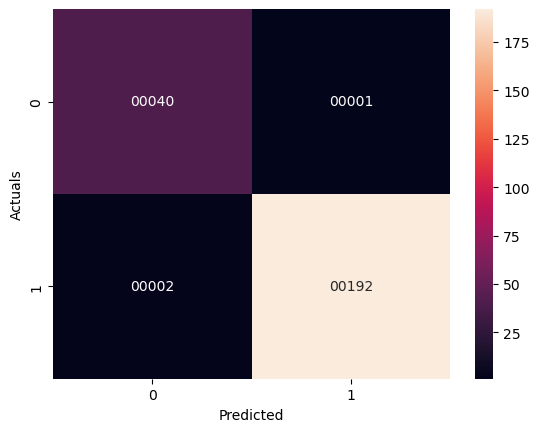

 Classification_Report of  KNeighborsClassifier()

               precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.99      0.99      0.99       194

    accuracy                           0.99       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.99      0.99      0.99       235

----------------------------------------------------------------------------------
Metrics of  SVC(kernel='linear')

 Accuracy_score of the SVC(kernel='linear') = 0.9744680851063829 


 Confusion_matrix  of the SVC(kernel='linear') = [[ 38   3]
 [  3 191]]

 Heat map of SVC(kernel='linear')


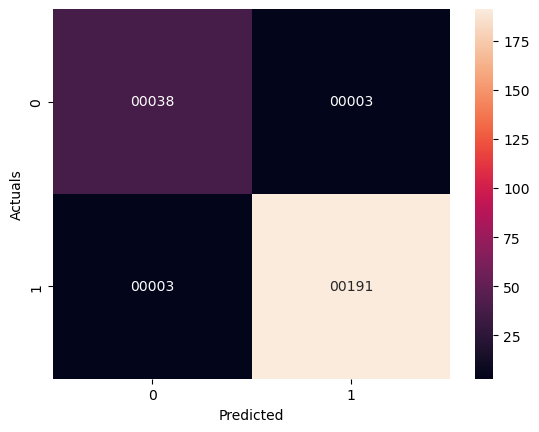

 Classification_Report of  SVC(kernel='linear')

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.98      0.98      0.98       194

    accuracy                           0.97       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.97      0.97      0.97       235

----------------------------------------------------------------------------------
Metrics of  RandomForestClassifier()

 Accuracy_score of the RandomForestClassifier() = 0.9872340425531915 


 Confusion_matrix  of the RandomForestClassifier() = [[ 39   2]
 [  1 193]]

 Heat map of RandomForestClassifier()


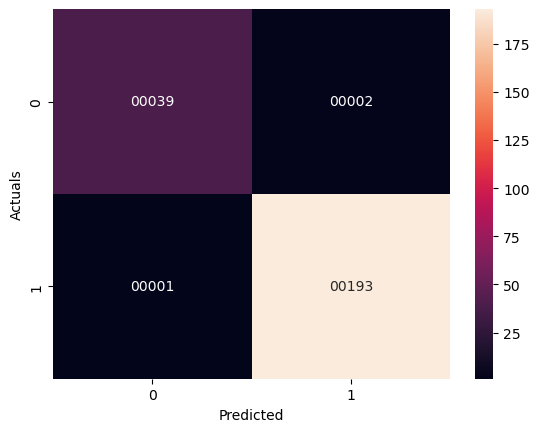

 Classification_Report of  RandomForestClassifier()

               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.99      0.99      0.99       194

    accuracy                           0.99       235
   macro avg       0.98      0.97      0.98       235
weighted avg       0.99      0.99      0.99       235

----------------------------------------------------------------------------------


In [86]:
compare_models_train_test()